##### *Importing Libraries*

In [1]:
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### *Import or Read csv file whch has Sales data.*

In [85]:
df = pd.read_csv(r"D:\projects\Completed\Python\Diwali Sales Analysis\Diwali Sales Data.csv"
                 ,encoding='unicode_escape')

##### *General Checks*

In [3]:
#checking rows,columns count
df.shape

(11251, 15)

In [86]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


##### *Dropping unrelated/blank columns and Null(NaN) values*

In [89]:
#Drop 'Status' and 'unnamed1' columns because they are completely blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)#axis=1 indicates columns

In [90]:
#Check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#drop the null values
df.dropna(inplace=True)

In [9]:
df.Amount.dtypes

dtype('float64')

In [10]:
#change the Amount columns values to int
df.Amount=df.Amount.astype('int')
df.Amount.dtypes

dtype('int64')

In [91]:
#get the column names
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [92]:
#Rename column
df.rename(columns={'Cust_name':'Customer_Name'})

,User_ID,Customer_Name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,Married,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,Unmarried,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,Unmarried,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,Married,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,Unmarried,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,Unmarried,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,Married,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,Married,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,Married,Karnataka,Southern,Agriculture,Office,3,206.0


In [93]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,2.489290,9453.610858
std,1.716125e+03,12.754122,1.115047,5222.355869
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [14]:
#using describe for User_ID doesn't looks good
#so use the describe() function for specific columns'
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

## Gender

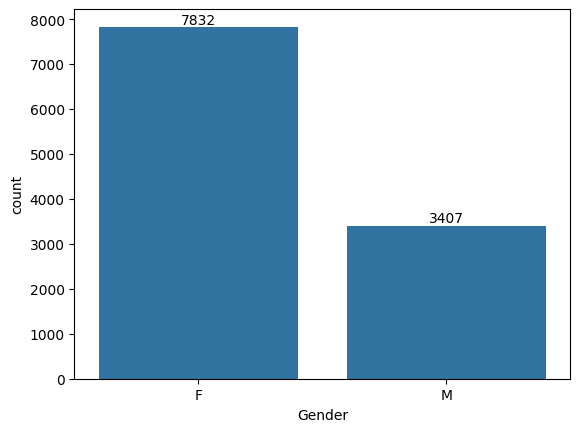

In [15]:
#to get the count of customers based on genders plot bar chart
Gender_count = sns.countplot(x=df.Gender,data=df)

#to label the count on the bars
for bars in Gender_count.containers:
    Gender_count.bar_label(bars)

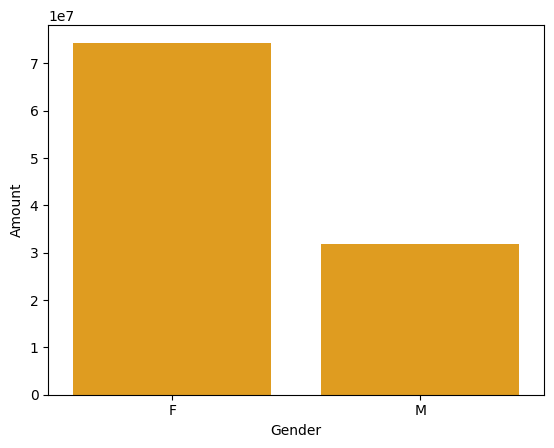

In [20]:
#plot a bar chart to show how much Amount was spent in total by each gender

#Design the dataframe
sales_by_gen=(df.groupby(['Gender'],as_index=False) #group by Gender
                ['Amount'].sum().sort_values(by='Amount',ascending=False)) #To get Total amount in the Gender column

#plot bar chart using the designed dataframe
Amount_by_gen=sns.barplot(x='Gender',y='Amount',data=sales_by_gen,color='orange')

*Insight: From above graphs we can see that most of the buyers are females and even the purchasing power of women are greater than man*

## Age

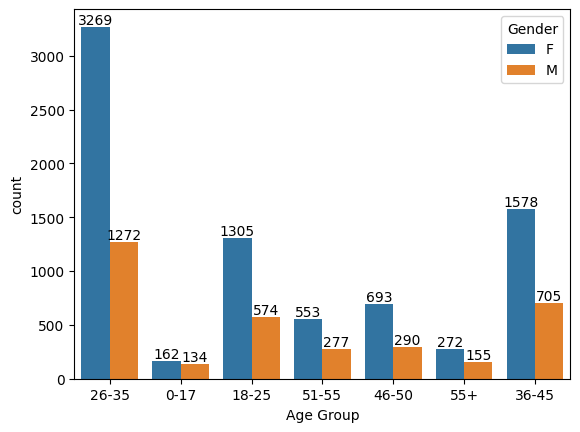

In [26]:
#to get the count of customers based on age group and genders plot bar chart
age_gen_count=sns.countplot(x='Age Group',data=df,hue='Gender') #plots the age group and count thn age group is diffrentiated to gender

#to get the values on top of the bars
for bars in age_gen_count.containers:
    age_gen_count.bar_label(bars)

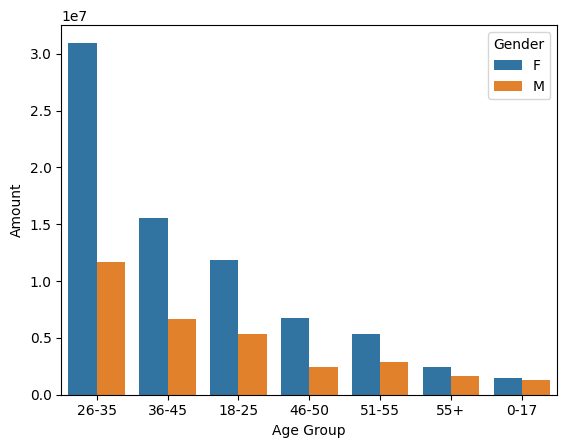

In [45]:
#plot a bar chart to show how much Amount was spent in total based on the Age group and Gender

#Design the dataframe
sales_by_age=(df.groupby(['Age Group','Gender'],as_index=False)     #groups by age group
                    ['Amount'].sum().sort_values(by='Amount',ascending=False))     #to get the total amount of each age group

#plot the bar chart using designed dataframe
amount_by_age=sns.barplot(x= 'Age Group',y='Amount',data=sales_by_age,hue='Gender')

*Insight: From above graphs we can see that most of the buyers are of age group 26-35 yrs females*

## State

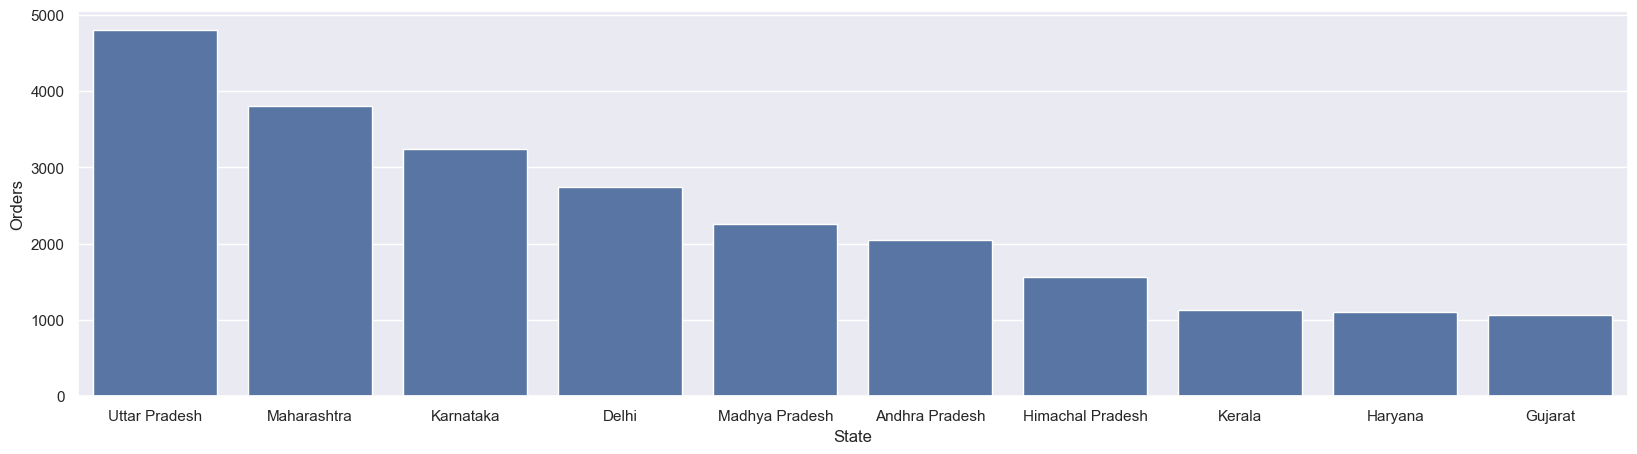

In [57]:
#to get the count of orders from top 10 States
orders_by_state=(df.groupby(['State'],as_index=False)
                    ['Orders'].sum().sort_values(by='Orders',ascending=False).head(10))

#now plot the bar chart for above dataframe
sns.set(rc={'figure.figsize':(20,5)})
sales_state=sns.barplot(x='State',y='Orders',data=orders_by_state)

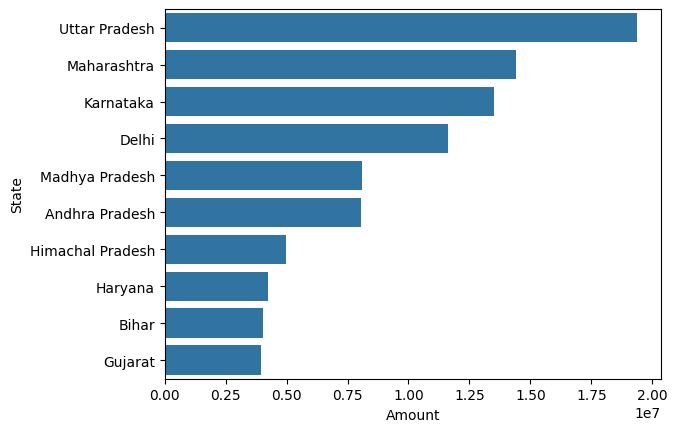

In [46]:
#plot a bar chart to show total amount/sales of the top 10 states

#Design the dataframe
amount_by_state=(df.groupby(['State'],as_index=False)
                        ['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10))

#now plot the bar chart using the above dataframe
total_sales_state=sns.barplot(x='Amount',y='State',data=amount_by_state),

*Insight: From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

## Marital Status

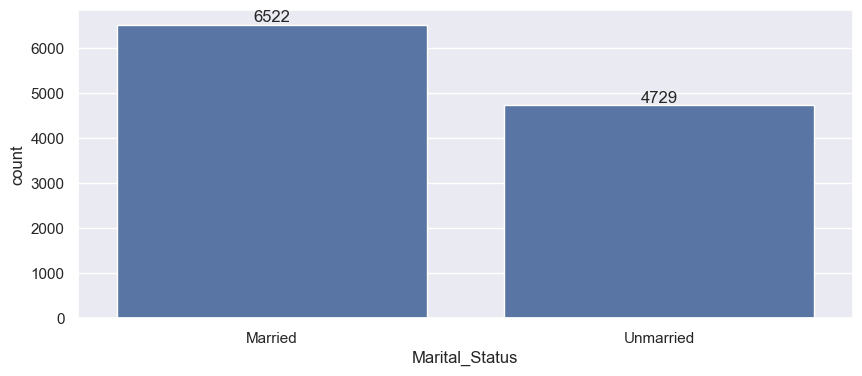

In [106]:
#to get the count of married and unmarried
count_marry_status=sns.countplot(x='Marital_Status',data=df)

#to get the values above the bars
sns.set(rc={'figure.figsize':(8,4)})
for bars in count_marry_status.containers:
    count_marry_status.bar_label(bars)

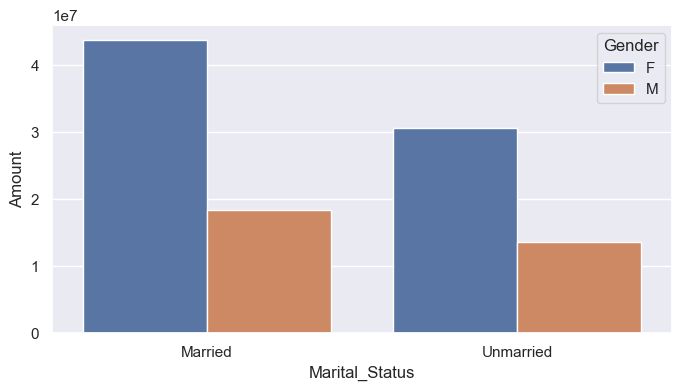

In [107]:
#plot a bar chart to show the total amount spent by married,unmarried men and women

#Design the dataframe
amount_by_marry=(df.groupby(['Marital_Status','Gender'],as_index=False)
                        ['Amount'].sum().sort_values(by=['Amount'],ascending=False))

#plot the bar chart using the above dataframe
sales_by_marry=sns.barplot(x='Marital_Status',y='Amount',data=amount_by_marry,hue='Gender')

*Insight: From above graphs we can see that most of the buyers are married women and they have high purchasing power*

## Occupation

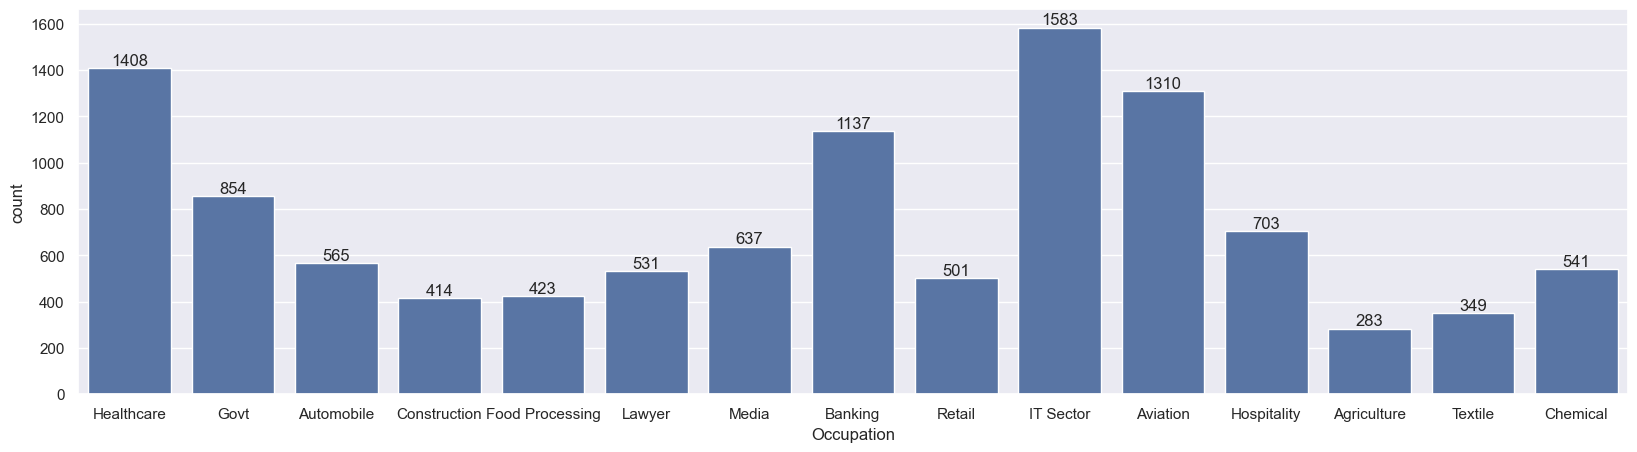

In [61]:
#to get the count of customers working in each occupation
sns.set(rc={'figure.figsize':(20,5)}) #r-->row or x-axis,c-->column or y-axis
count_occp=sns.countplot(x='Occupation',data=df)

#to get the values on bars
for bars in count_occp.containers:
    count_occp.bar_label(bars)

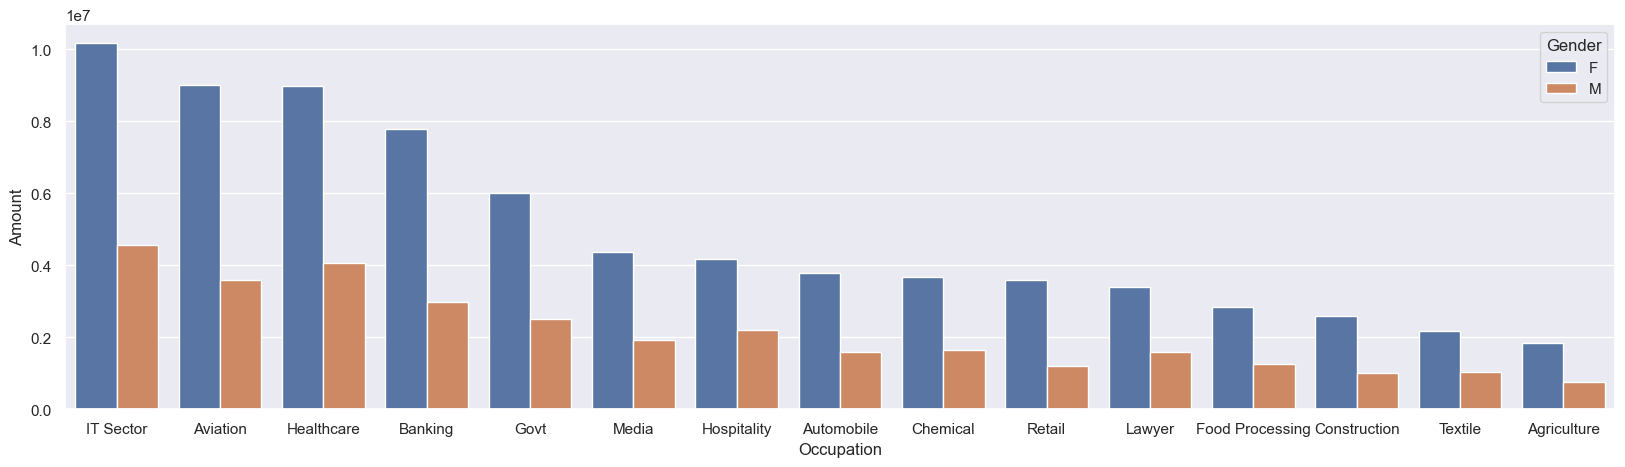

In [65]:
#plot a bar chart to show how much Amount was spent in total based on the Occupation and Gender

#Design the dataframe
amount_by_occp=(df.groupby(['Occupation','Gender'],as_index=False)
                    ['Amount'].sum().sort_values(by=['Amount'],ascending=False))

#plot the bar chart using the above dataframe
sales_by_occup= sns.barplot(x='Occupation',y='Amount',data=amount_by_occp,hue='Gender')

*From above graphs we can see that most of the buyers are working in IT, Healthcare,Aviation sector and most of them are females.*

## Product Category

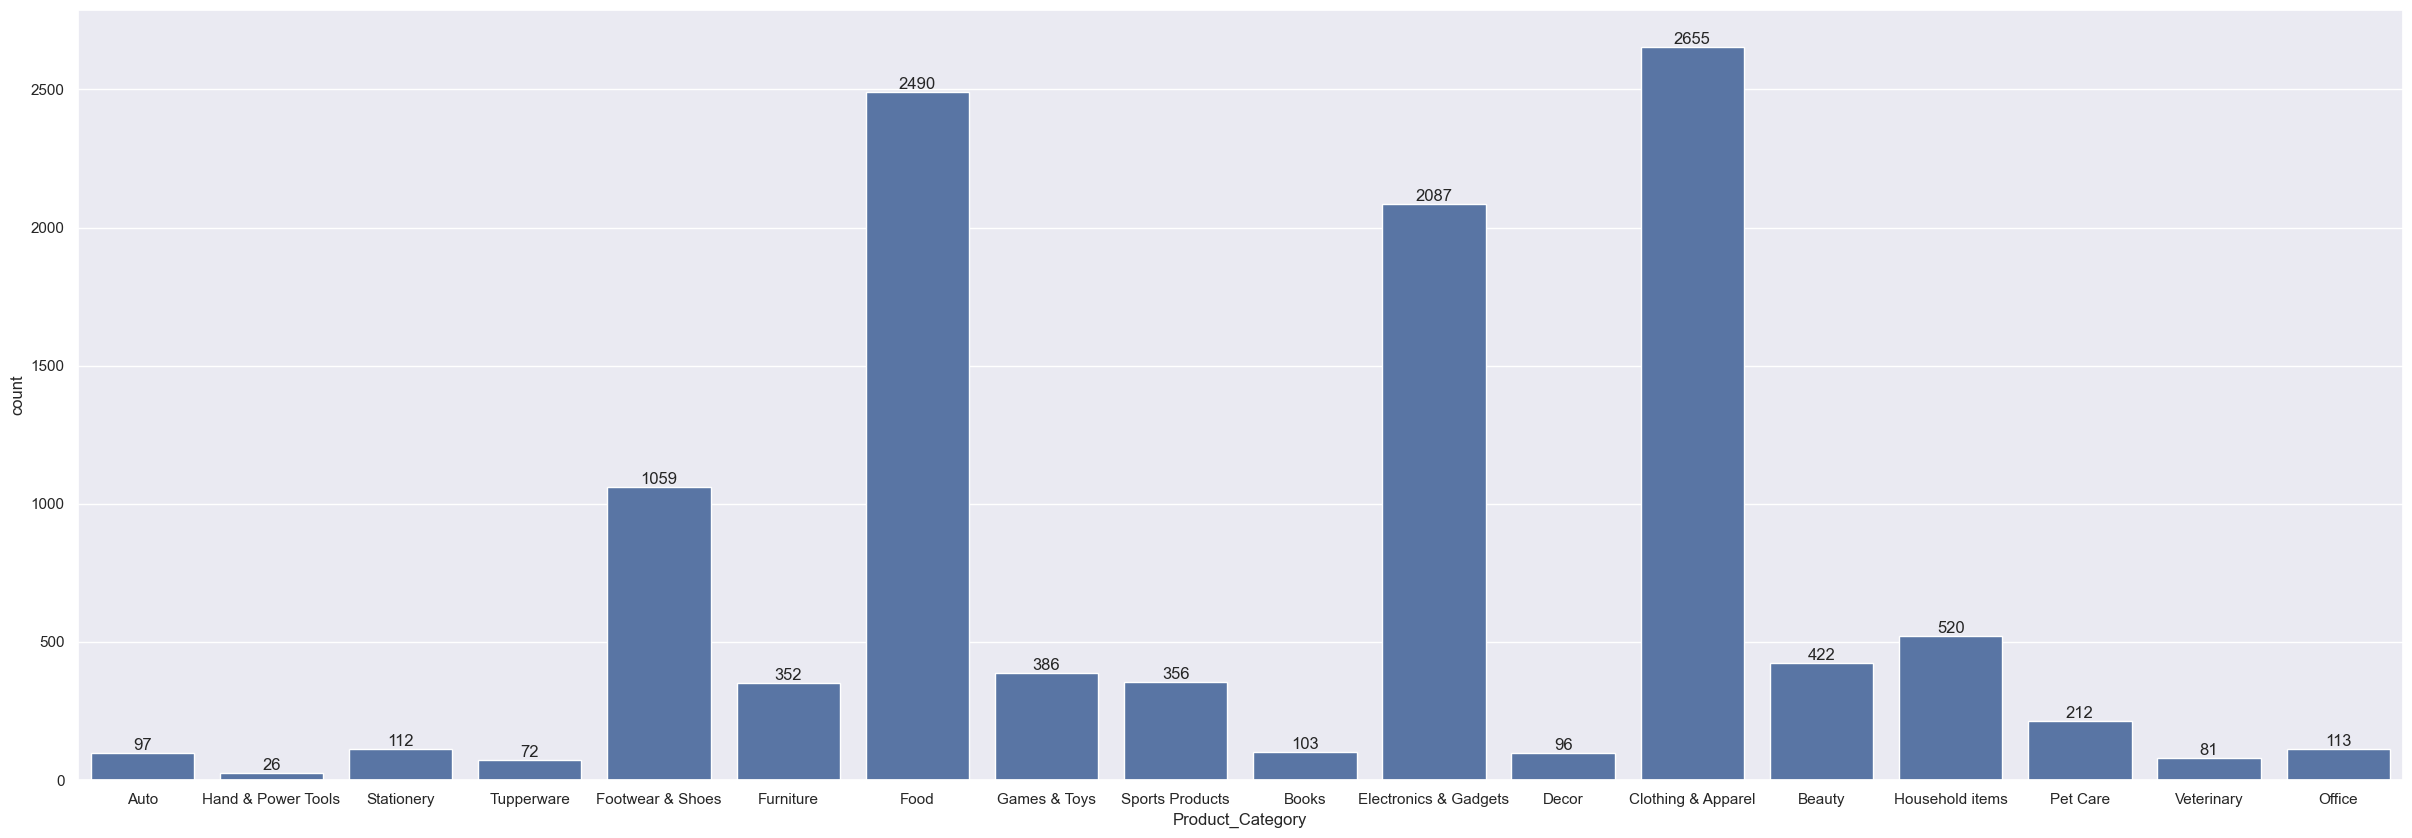

In [73]:
#to get the count of the products based on each category
sns.set(rc={'figure.figsize':(30,10)})
count_pdct=sns.countplot(x='Product_Category',data=df)

#to get the values above the bars
for bars in count_pdct.containers:
    count_pdct.bar_label(bars)

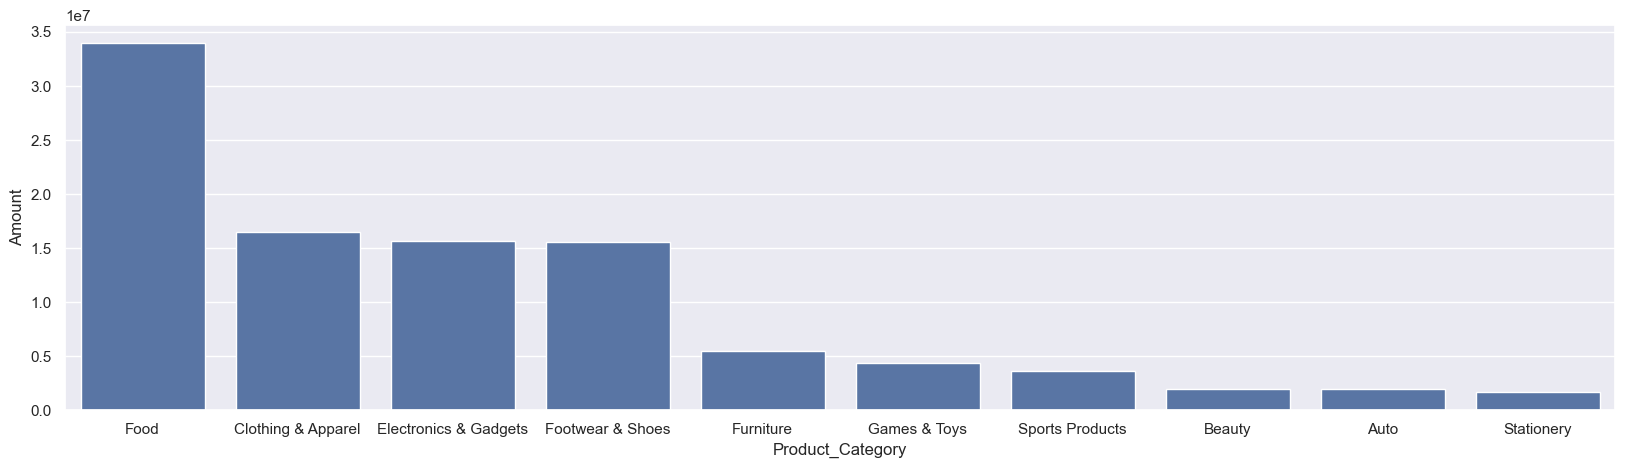

In [76]:
#plot a bar chart to show how much Amount was spent on top 10 product category

#Design the dataframe
amount_pdct=(df.groupby(['Product_Category'],as_index=False)
                ['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10))

#plot bar chart using above dataframe
sns.set(rc={'figure.figsize':(20,5)})
sales_pdct=sns.barplot(x='Product_Category',y='Amount',data=amount_pdct)

*Insight: From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

## Products

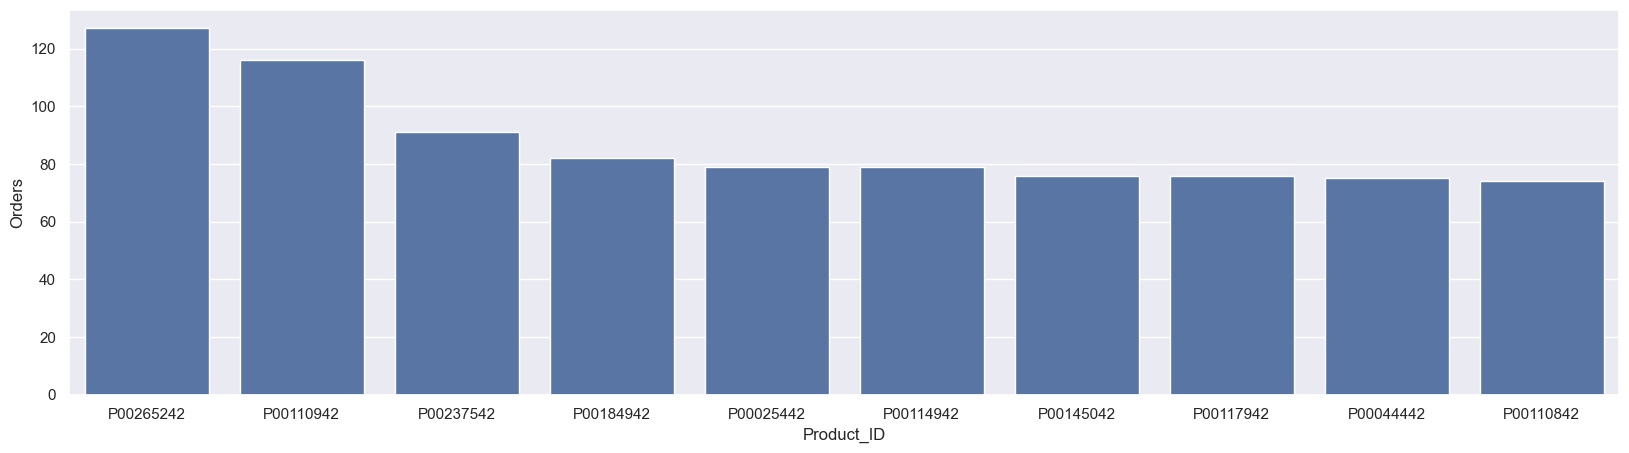

In [84]:
#plot a bar chart to see which products were most ordered

#Design the dataframe
order_prdct=(df.groupby(['Product_ID'],as_index=False)
                       ['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10))

#plot the bar chart using above dataframe
prdct_orders=sns.barplot(x='Product_ID',y='Orders',data=order_prdct)

*Insight: From the above graph we can see that P00265242,P00110942,P00237542 are the most sold products*

#### INSIGHTS

*1. Most of the buyers are females and even the purchasing power of women are greater than man.*\
*2. Most of the buyers are of age group 26-35 yrs females.*\
*3. Most of the Orders & Sales are from Uttar Pradesh, Maharashtra and Karnataka respectively.*\
*4. Most of the buyers are married women and they have high purchasing power.*\
*5. Most of the buyers are working in IT, Healthcare,Aviation sector and most of them are females.*\
*6. Most of the sold products are from Food, Clothing and Electronics category.*

# Conclusion

#### *Married women of age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*